## Clase 18 - Procesamiento y Clasificación de Texto

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

## Objetivos de la Clase

- Introducirlos a clasificación de Texto.
- Introducirlos al Procesamiento de Lenguaje Natural.
- Técnicas clásicas de clasificación de texto basadas en Bag of Words.
- N-gramas, Stopwords, Stemming, Lemmatización.

---

## Procesamiento de Lenguaje Natural (NLP)

NLP es un area de la computación y la linguística que en terminos simples:
    
> Desarrolla métodos para resolver problemas prácticos que involucran lenguaje.

En general, la idea es que los modelos que creemos tomen texto generado por humanos y produzcan:
 - Información util sobre este (clasificación o regresión) 
 - Información útil sobre cada palabra.
 - Nuevos textos derivados a partir del original.

NLP funciona en base a distintas tareas/tasks. Cada tarea tiene un campo de acción definido, sus propios datasets y sus propias metodologías.

Ejemplos de estas tareas: 

1. Análisis de Sentimientos/Emociones
2. Traducción automática.
3. Detección de los componentes de las oraciones (verbos, adjetivos, etc..) y de entidades nombradas (nombres de personas, lugares, empresas, etc...)
4. Resumen automatizado de textos.
5. Question-Answering
...



Comunmente cada tarea tiene una competencia asociada en donde los investigadores muestran como sus nuevos modelos mejoran (en 0.001%) los puntajes anteriores.



> Recomendado 10/10 -> **CC6205 - Natural Language Processing**

Páginas que muestran las tareas y avances en NLP:

http://nlpprogress.com/
    
https://paperswithcode.com/dataset/squad    

---

## Problema de Hoy: 😄😐😢 Análisis de Sentimientos 😄😐😢 [En español]


<center>
    <img src='./resources/task1.png' width=500/>
    </center>


<center>
    Fuente: <a href='http://tass.sepln.org/2020/'>http://tass.sepln.org/2020/</a>
    </center>
    


In [291]:
import pandas as pd

train = pd.read_csv(
    "./resources/train.tsv", sep="\t", usecols=[1, 2], names=["tweet", "sentimiento"]
)
dev = pd.read_csv(
    "./resources/dev.tsv", sep="\t", usecols=[1, 2], names=["tweet", "sentimiento"]
)

In [292]:
train

,tweet,sentimiento
0,En definitiva! Me quedé sin campo para ir a Ta...,N
1,@dianalaa32 Es una escena de uno de los docume...,P
2,Qué feo es tener que terminar con alguien; y m...,N
3,"Oído en McDonalds ""el mejor mannequin challeng...",N
4,Tengo que aceptar que me esta hundiendo el con...,NEU
...,...,...
4797,¿Qué tipo de proyecto de diseño es tu preferid...,NEU
4798,Que bueno ver a personas que te alegran Aunque...,P
4799,@migueldobrich gracias queridísimo ! Buenísimo...,P
4800,@gabouy pero antes si era asi es parte de nues...,N


In [298]:
train.iloc[2501, 0]

'@vicmanini Así es Vic, me gustó mucho Bonito Martes'

In [300]:
train["sentimiento"].value_counts().to_frame() / 4802 

,sentimiento
N,0.392545
NEU,0.317160
P,0.290296


In [4]:
dev

,tweet,sentimiento
0,Antojo de empanada colombiana,NEU
1,Me volvieron a dejar sola,N
2,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU
...,...,...
2438,"@sebatramp Acá también, Seba ???? Para peor el...",N
2439,@Phoyu_Agustina no soy hack pero es imposible ...,NEU
2440,Nadie te vende un The Last of Us Remastered po...,N
2441,"Me propuse dejar las redes, las salidas &amp; ...",NEU


In [5]:
dev["sentimiento"].value_counts().to_frame()

,sentimiento
N,951
NEU,793
P,699


In [6]:
dev.shape[0] / train.shape[0]

0.5087463556851312

El dataset de prueba tiene la mitad de ejemplos que el de entrenamiento!

### Train, Dev y Test

Noten que el dataset que cargamos estaba ya dividido en dos partes: `Train` y `Dev`.
Comunmente cuando hay competencias, se tiende a dividir el dataset en tres partes: `Train`, `Dev` y `Test`. En palabras simples:

1. `Train`: Conjunto de entrenamiento
2. `Dev`: Conjunto de pruebas. Permite buscar los mejores hiperparámetros.
3. `Test`: Conjunto con el cual se evaluará la competencia. NO tenemos acceso a las labels de este conjunto. 

<center>
<img src='./resources/dataset_division.png' width=800/>
</center>





## Bag of Words

Es probablemente el modelo más sencillo para codificar texto.
Consiste en contar las veces que aparece cada palabra en una oración y partir de eso construir vectores.
En estos vectores, cada palabra del vocabulario tiene una columna asociada. Los valores que tome una posición (i,j) será la cantidad de veces que la palabra j apareció en la oración i.

<center>
<img src='./resources/bow.PNG'/>
</center>
<center>
Fuente: <a href='https://medium.com/swlh/spam-filtering-using-bag-of-words-aac778e1ee0b'> https://medium.com/swlh/spam-filtering-using-bag-of-words-aac778e1ee0b<a/>
</center>


In [301]:
dev["tweet"]

0                           Antojo de empanada colombiana
1                               Me volvieron a dejar sola
2              @ManuTonic Buenotes diotas. Un gran abrazo
3          cual es su mejor recuerdo juntos? #BntResponde
4        @leonora_monge @susi_sot por mi sí, con 20 rojos
                              ...                        
2438    @sebatramp Acá también, Seba ???? Para peor el...
2439    @Phoyu_Agustina no soy hack pero es imposible ...
2440    Nadie te vende un The Last of Us Remastered po...
2441    Me propuse dejar las redes, las salidas &amp; ...
2442    @irenichus siii! Voy como en media hora. Me va...
Name: tweet, Length: 2443, dtype: object

In [304]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(train["tweet"])

In [305]:
bow

<4802x14881 sparse matrix of type '<class 'numpy.int64'>'
	with 67093 stored elements in Compressed Sparse Row format>

In [307]:
4802*14881

71458562

In [302]:
print(vectorizer.get_feature_names()[500:600])

['alwaysb0ndar', 'alzheimer', 'am', 'ama', 'amaba', 'amable', 'amables', 'amada', 'amado', 'amados', 'amando', 'amanecer', 'amaneció', 'amanecí', 'amar', 'amareto', 'amarga', 'amargura', 'amarillo', 'amarla', 'amartino', 'amas', 'amazon', 'ambas', 'ambiente', 'ambiguo', 'ambos', 'ambulantes', 'ame', 'amenecí', 'america', 'american', 'americana', 'americano', 'americas', 'ami', 'amiga', 'amigaa', 'amigas', 'amigo', 'amigos', 'amiguitaaaa', 'amiguitos', 'amistad', 'amnesia', 'amo', 'amoo', 'amoooooo', 'amor', 'amores', 'amorosa', 'amoroso', 'amorosos', 'amorr', 'amour', 'amoviajar', 'amp', 'amsterdam', 'amuntvalencia', 'amé', 'américa', 'an_luc', 'ana', 'anabelcampo', 'anasjuarez', 'anaylamaria', 'and', 'anda', 'andaba', 'andaban', 'andar', 'andas', 'andate', 'anddcampa', 'andes', 'ando', 'andreajarsenal', 'andreanorieega', 'andrearvenegas', 'andreavasro', 'andresajeno', 'andresferfer', 'andresg9108', 'andreswieser', 'andrewmartin711', 'andricsaba', 'android', 'andynuinsa', 'andállevando

In [308]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Al igual que la clase anterior, generaremos un pipeline baseline para comparar después posibles mejoras a este.


Nuestro pipeline se comprondrá de: 

1. Vectorizador
2. Naive Bayes Multinomial


> **Pregunta**: ¿Por qué en particular esta variante de Naive Bayes?

In [309]:
baseline = Pipeline(steps=[("bow", CountVectorizer()), 
                           ("clf", MultinomialNB())])

In [310]:
X_train = train["tweet"]
y_train = train["sentimiento"]

X_dev = dev["tweet"]
y_dev = dev["sentimiento"]

baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_dev)

In [311]:
baseline_clf_report = classification_report(y_dev, y_pred)
print(baseline_clf_report)

              precision    recall  f1-score   support

           N       0.51      0.82      0.63       951
         NEU       0.50      0.24      0.33       793
           P       0.61      0.46      0.52       699

    accuracy                           0.53      2443
   macro avg       0.54      0.51      0.49      2443
weighted avg       0.53      0.53      0.50      2443



In [312]:
baseline.predict(['estoy un poco triste'])

array(['N'], dtype='<U3')

In [313]:
baseline.predict(['estoy un poco feliz'])

array(['P'], dtype='<U3')

In [314]:
baseline.predict(['estoy comiendo chicle'])

array(['N'], dtype='<U3')

In [315]:
baseline.predict(['no estoy feliz'])

array(['P'], dtype='<U3')

### Problema `GridSearchCV`

Recordemos el dataset original:
<center>
<img src='./resources/dataset_division2.png' width=800/>
</center>


Al usar grid-search, estaremos usando los K-Fold generados sobre el conjunto de entrenamiento para probar, cuando el dev set está pensado para esto.


<center>
<img src='./resources/kfold.png' width=800/>
</center>


Por lo tanto, no es tan buena idea usar GridSearch para buscar los mejores hiperparámetros.
Entonces, nos quedan dos opciones:

1. Hacer la búsqueda a mano.
2. Adaptar `GridSearchCV` para que realize el test solo en el conjunto `dev`.
    Referencias para esto: 
    - https://stackoverflow.com/questions/31948879/using-explicit-predefined-validation-set-for-grid-search-with-sklearn
    - https://stackoverflow.com/questions/46815252/using-scikit-learn-gridsearchcv-for-cross-validation-with-predefinedsplit-susp


Para no complicar esta clase, haremos la búsqueda a mano.

In [317]:
print(baseline_clf_report)

              precision    recall  f1-score   support

           N       0.51      0.82      0.63       951
         NEU       0.50      0.24      0.33       793
           P       0.61      0.46      0.52       699

    accuracy                           0.53      2443
   macro avg       0.54      0.51      0.49      2443
weighted avg       0.53      0.53      0.50      2443



---

## Técnicas para Mejorar la Predicción

### Tokenizador


Es la herramienta encargada de separar cada componente de una oración (o token).

In [18]:
tweet_ej = train.loc[1800, "tweet"]
tweet_ej

'¿Por qué la gente dice que un país, por ejemplo, México es violento? Digo yo, ¿en qué país no hay violencia? Fíjense en Francia. '

In [19]:
tweet_ej.split(" ")

['¿Por',
 'qué',
 'la',
 'gente',
 'dice',
 'que',
 'un',
 'país,',
 'por',
 'ejemplo,',
 'México',
 'es',
 'violento?',
 'Digo',
 'yo,',
 '¿en',
 'qué',
 'país',
 'no',
 'hay',
 'violencia?',
 'Fíjense',
 'en',
 'Francia.',
 '']

> ¿Qué problema presenta el tokenizador que propusimos?

In [318]:
'Por' != '¿Por'

True

Hay muchar herramientas que implementan tokenizadores más complejos que el que vimos recién. 
En este caso, usaremos la librería Natural Language Toolkit [`NLTK`] .

In [319]:
import nltk

nltk.download("perluniprops")
nltk.download("nonbreaking_prefixes")
from nltk.tokenize.toktok import ToktokTokenizer

[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/pablo/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/pablo/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [23]:
nltk_tokenizer = ToktokTokenizer()
nltk_tokenizer.tokenize(tweet_ej)

['¿',
 'Por',
 'qué',
 'la',
 'gente',
 'dice',
 'que',
 'un',
 'país',
 ',',
 'por',
 'ejemplo',
 ',',
 'México',
 'es',
 'violento',
 '?',
 'Digo',
 'yo',
 ',',
 '¿',
 'en',
 'qué',
 'país',
 'no',
 'hay',
 'violencia',
 '?',
 'Fíjense',
 'en',
 'Francia.']

In [322]:
nltk_tokenizer.tokenize('Hola, como estas?')

['Hola', ',', 'como', 'estas', '?']

In [320]:
pipe_tokenizer = Pipeline(
    steps=[
        ("bow", CountVectorizer(tokenizer=nltk_tokenizer.tokenize)),
        ("clf", MultinomialNB()),
    ]
)

pipe_tokenizer.fit(X_train, y_train)
y_pred = pipe_tokenizer.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.51      0.83      0.63       951
         NEU       0.51      0.24      0.33       793
           P       0.61      0.48      0.54       699

    accuracy                           0.54      2443
   macro avg       0.55      0.51      0.50      2443
weighted avg       0.54      0.54      0.51      2443



In [25]:
print(baseline_clf_report)

              precision    recall  f1-score   support

           N       0.51      0.82      0.63       951
         NEU       0.50      0.24      0.33       793
           P       0.61      0.46      0.52       699

    accuracy                           0.53      2443
   macro avg       0.54      0.51      0.49      2443
weighted avg       0.53      0.53      0.50      2443



### Otros parámetros del Vectorizador

#### Solo Considerar Minúsculas


Recuerden que: 

`Juan` es distinto que `juan`. Ambos ocupan un espacio de features distinto. Por ende, son mapeados a columnas distintas.


In [323]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=nltk_tokenizer.tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.51      0.83      0.63       951
         NEU       0.51      0.24      0.33       793
           P       0.61      0.48      0.54       699

    accuracy                           0.54      2443
   macro avg       0.55      0.51      0.50      2443
weighted avg       0.54      0.54      0.51      2443



#### Limitar la Cantidad de Palabras del Vocabulario 

In [324]:
import numpy as np
import plotly.express as px

In [325]:
tokens_entrenamiento = [nltk_tokenizer.tokenize(doc) for doc in train["tweet"].values]
tokens_entrenamiento = [item for sublist in tokens_entrenamiento for item in sublist]
tokens = pd.Series(tokens_entrenamiento)

In [326]:
tokens.head(10)

0            En
1    definitiva
2             !
3            Me
4         quedé
5           sin
6         campo
7          para
8            ir
9             a
dtype: object

In [327]:
conteo_tokens = tokens.value_counts().to_frame().reset_index()
conteo_tokens.columns = ["token", "cantidad"]

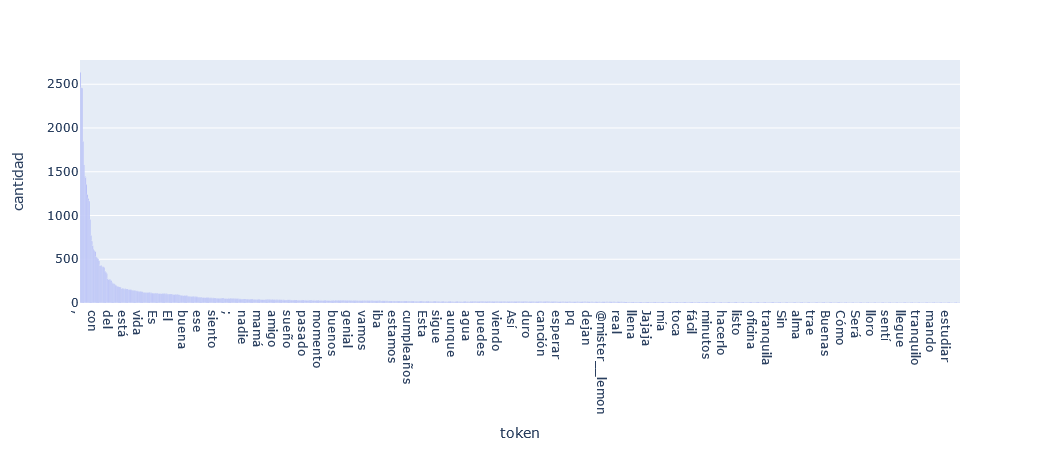

In [328]:
px.bar(conteo_tokens[0:1000], x="token", y="cantidad")

Hay palabras que aparecen solo 1 vez. ¿Será util tenerlas?

In [329]:
from sklearn.metrics import f1_score

In [330]:
scores = []
for i in range(500, 10000, 500):
    pipe = Pipeline(
        steps=[
            (
                "bow",
                CountVectorizer(
                    tokenizer=nltk_tokenizer.tokenize,
                    lowercase=True,  # Transformamos todo a minúsuculas.
                    max_features=i,  # Dejamos solo las 10000 palabras más frecuentes,
                    strip_accents="ascii",
                ),
            ),
            ("clf", MultinomialNB()),
        ]
    )
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_dev)
    scores.append([i, f1_score(y_dev, y_pred, average="macro")])

scores = np.array(scores)

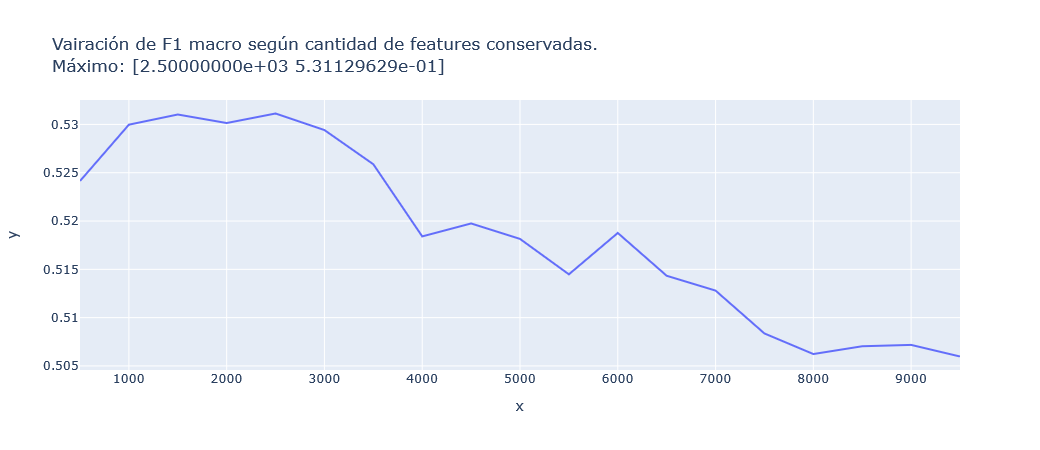

In [331]:
px.line(
    x=scores[:, 0],
    y=scores[:, 1],
    title=f"Vairación de F1 macro según cantidad de features conservadas.<br>Máximo: {scores[np.argmax(scores, axis=0)[1]]}",
)

In [332]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=nltk_tokenizer.tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=2500,  # Dejamos solo las 5000 palabras más frecuentes,
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.56      0.69      0.62       951
         NEU       0.48      0.36      0.41       793
           P       0.58      0.56      0.57       699

    accuracy                           0.55      2443
   macro avg       0.54      0.54      0.53      2443
weighted avg       0.54      0.55      0.54      2443



> **Pregunta:** ¿Será mejor usar los selectores de características que vimos la clase pasada?

#### Eliminar Acentos y Símbolos Extraños de los Tokens

In [333]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=nltk_tokenizer.tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=2500,  # Dejamos solo las 10000 palabras más frecuentes,
                strip_accents="ascii",
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.56      0.69      0.62       951
         NEU       0.47      0.36      0.41       793
           P       0.58      0.55      0.57       699

    accuracy                           0.54      2443
   macro avg       0.54      0.53      0.53      2443
weighted avg       0.54      0.54      0.54      2443



> Noten que papá y papa Quedan en la misma columna!

### Eliminación de Stopwords

Las stopwords son palabras muy comunes que no aportan mayor información.

In [98]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stopwords = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /home/pablo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [335]:
sorted(list(stopwords))

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [336]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=nltk_tokenizer.tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=2500,  # Dejamos solo las 10000 palabras más frecuentes,
                stop_words=stopwords,
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.55      0.63      0.59       951
         NEU       0.44      0.35      0.39       793
           P       0.56      0.58      0.57       699

    accuracy                           0.53      2443
   macro avg       0.52      0.52      0.52      2443
weighted avg       0.52      0.53      0.52      2443



> **Pregunta**: ¿Por qué los puntajes bajaron?

### Bonus: WordClouds

Herramienta de visualización que permite ver las veces que aparece cada palabra en un texto.

In [337]:
# unimos todos los tweets en un solo gran texto
text = " ".join(train["tweet"].tolist())
text[0:100]

'En definitiva! Me quedé sin campo para ir a Tacares, ya que me había mentalizado y ya hasta quería i'

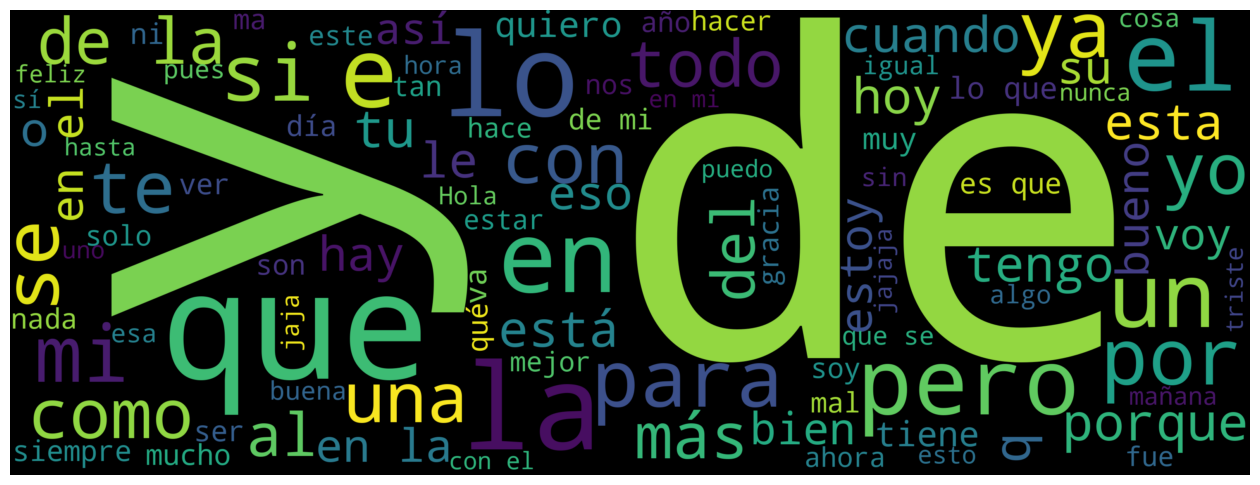

In [276]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = [16, 9]
# Create and generate a word cloud image:


wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

# Display the generated image:
plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

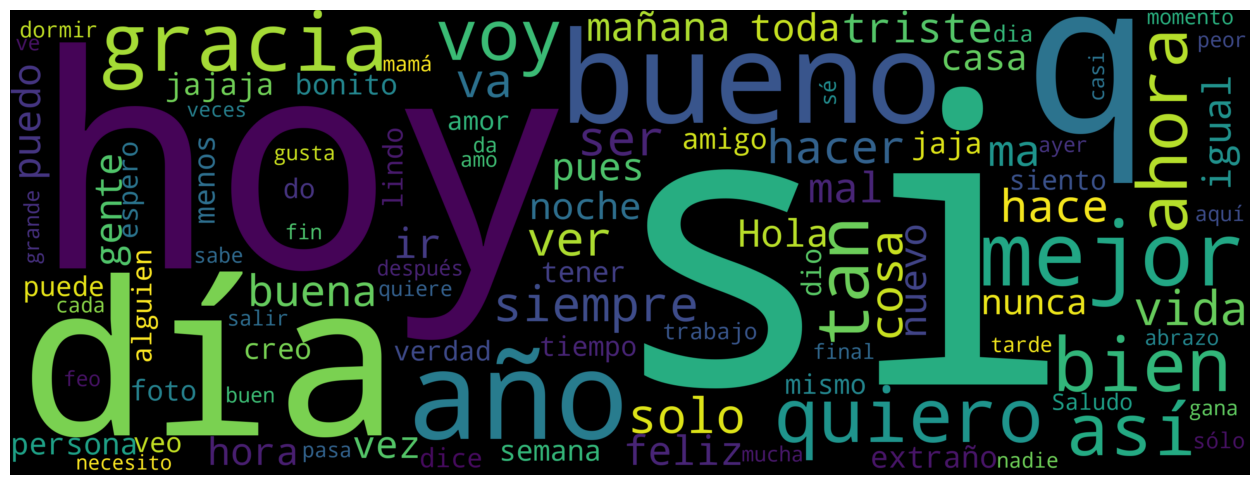

In [135]:
wordcloud = WordCloud(
    scale=2, width=1600, height=600, max_words=100, stopwords=stopwords
).generate(
    text,
)

# Display the generated image:
plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

### N-Gramas

Consideren el caso de `Buenos Aires`


`Buenos` y `Aires` por separado no tienen mucho significado por si solos, pero `Buenos Aires` si que lo tiene. 
Nos gustaría decirle a nuestro tokenizador que use también este tipo de combinaciones. Para esto, le especificaremos que use `n-gramas`.


Un n-grama es una subsecuencia de una secuencia más grande. El n determinará el largo de las secuencias.
Ejemplo.

Hace frio en Buenos Aires.

1-gramas: 

    Hace, frio, en, Buenos, Aires.

2-gramas:

    Hace frio, frio en, en Buenos, Buenos Aires.
    
...

En count vectorizer se especifican a través de una tupla: 

`ngram_range = (minimo n-gramas, máximo n-gramas)`

In [339]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=nltk_tokenizer.tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=10000,  # Dejamos solo las 10000 palabras más frecuentes,
                ngram_range=(1,2),
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.56      0.72      0.63       951
         NEU       0.49      0.37      0.43       793
           P       0.59      0.53      0.56       699

    accuracy                           0.55      2443
   macro avg       0.55      0.54      0.54      2443
weighted avg       0.55      0.55      0.54      2443



In [158]:
from sklearn.model_selection import ParameterGrid

grid = {
    "bow__stop_words": [None, stopwords],
    "bow__max_features": range(500, 10000, 500),
    "bow__ngram_range": [(1, 1), (1, 2), (1, 3)],
}

In [161]:
pipe = Pipeline(
    steps=[
        ("bow",CountVectorizer(),),
        ("clf", MultinomialNB()),
    ]
)


best_score = 0

for g in ParameterGrid(grid):
    pipe.set_params(**g)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_dev)
    score = f1_score(y_dev, y_pred, average="macro")
    if score > best_score:
        best_score = score
        best_grid = g

print("OOB: %0.5f" % best_score)
print("Grid:", best_grid)

OOB: 0.54365
Grid: {'bow__max_features': 5000, 'bow__ngram_range': (1, 2), 'bow__stop_words': None}


### Stemming


Stem = Raiz.
Consiste en un conjunto de técnicas para encontrar la raiz de una palabra.

Ejemplos: 

    - Estoy comiendo tomates ->  estoy com tomat
    - Estoy comiendo tomatitos -> estoy com tomatit
    - Estoy comiendo tomatotes -> estoy com tomatot



In [167]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="spanish")

In [179]:
[snowball.stem(token) for token in  nltk_tokenizer.tokenize(tweet_ej)]

['¿',
 'por',
 'que',
 'la',
 'gent',
 'dic',
 'que',
 'un',
 'pais',
 ',',
 'por',
 'ejempl',
 ',',
 'mexic',
 'es',
 'violent',
 '?',
 'dig',
 'yo',
 ',',
 '¿',
 'en',
 'que',
 'pais',
 'no',
 'hay',
 'violenci',
 '?',
 'fijens',
 'en',
 'francia.']

Para usar el stemming en el CountVectorizer que genera los vecotres Bag of Words, redefiniremos el tokenizador con una función personalizada que:
    
    1. Tokeniza
    2. Aplica el stemming a cada palabra
    
    
    

In [177]:
def tokenize(text):
    tokens = nltk_tokenizer.tokenize(text)
    stems = [snowball.stem(token) for token in  nltk_tokenizer.tokenize(tokens)]
    return stems

Ya definida la función, ejecutamos:

In [178]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=tokenize,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=10000,  # Dejamos solo las 10000 palabras más frecuentes,
                ngram_range=(1, 1),
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.51      0.85      0.64       951
         NEU       0.49      0.22      0.30       793
           P       0.64      0.48      0.55       699

    accuracy                           0.54      2443
   macro avg       0.55      0.51      0.49      2443
weighted avg       0.54      0.54      0.50      2443



### Lematización

Consiste en encontrar el lema de una palabra. 

Según Wikipedia: 

> Lema de una palabra: Es una unidad autónoma constituyente del léxico de un idioma.

> La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente


Ejemplos: 

    Estoy comiendo tomates -> estar comer tomate
    Estoy comiendo tomatitos -> estar comer tomatito
    Estoy comiendo tomatotes -> estar comer tomatot


Para ver lematización, usaremos la librería `spaCy` ,

In [255]:
import spacy
import sys

!conda install --yes --prefix {sys.prefix} -c conda-forge spacy
!{sys.executable} -m spacy download es_core_news_lg

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 569.7 MB 78 kB/s s eta 0:00:01     |████████████▊                   | 225.7 MB 12.4 MB/s eta 0:00:28     |█████████████▌                  | 240.1 MB 11.2 MB/s eta 0:00:30     |███████████████████▊            | 350.2 MB 11.5 MB/s eta 0:00:20     |██████████████████████          | 393.5 MB 10.3 MB/s eta 0:00:18     |█████████████████████████████   | 515.0 MB 11.4 MB/s eta 0:00:05
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


`spaCy`utiliza los objetos `Doc` y `Token` como base para todas sus operaciones.

`nlp` Es el modelo que usaremos para generar tanto los docs como los tokens.

In [256]:
nlp = spacy.load("es_core_news_lg")

In [257]:
d1 = nlp(tweet_ej)

In [258]:
[t.text for t in d1]

['¿',
 'Por',
 'qué',
 'la',
 'gente',
 'dice',
 'que',
 'un',
 'país',
 ',',
 'por',
 'ejemplo',
 ',',
 'México',
 'es',
 'violento',
 '?',
 'Digo',
 'yo',
 ',',
 '¿',
 'en',
 'qué',
 'país',
 'no',
 'hay',
 'violencia',
 '?',
 'Fíjense',
 'en',
 'Francia',
 '.']

In [259]:
[t.lemma_ for t in d1]

['¿',
 'Por',
 'qué',
 'el',
 'gente',
 'decir',
 'que',
 'uno',
 'país',
 ',',
 'por',
 'ejemplo',
 ',',
 'México',
 'ser',
 'violento',
 '?',
 'decir',
 'yo',
 ',',
 '¿',
 'en',
 'qué',
 'país',
 'no',
 'haber',
 'violencia',
 '?',
 'fíjensar',
 'en',
 'Francia',
 '.']

Para usar este lematizador, hacemos lo mismo que el caso anterior.

In [260]:
def tokenize_with_lemma(text):
    doc = nlp(text)
    lemmas = [t.lemma_ for t in doc]
    return lemmas

In [261]:
pipe = Pipeline(
    steps=[
        (
            "bow",
            CountVectorizer(
                tokenizer=tokenize_with_lemma,
                lowercase=True,  # Transformamos todo a minúsuculas.
                max_features=10000,  # Dejamos solo las 10000 palabras más frecuentes,
                ngram_range=(1, 1),
            ),
        ),
        ("clf", MultinomialNB()),
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           N       0.53      0.82      0.64       951
         NEU       0.49      0.24      0.32       793
           P       0.63      0.53      0.57       699

    accuracy                           0.55      2443
   macro avg       0.55      0.53      0.51      2443
weighted avg       0.54      0.55      0.52      2443



### Paréntesis: Otros usos de `spaCy`

In [282]:
doc = nlp(
"""
Gracias a un acuerdo alcanzado entre las y los parlamentarios de la Comisión de Gobierno Interior con el Ejecutivo, la Sala de la Cámara aprobó, por 107 votos a favor, 16 en contra y 23 abstenciones, y despachó a tercer trámite, al Senado, el proyecto que declara el 24 de junio como el Día Nacional de los Pueblos Indígenas.
La semana pasada en la Sala se había aprobado en general la propuesta. Sin embargo, por ser objeto de indicaciones, volvió a la Comisión de Gobierno Interior para su análisis en particular.
El debate estuvo centrado en que algunas diputadas y diputados expresaron su preocupación por la derogación de la ley que establece el feriado del 29 de junio, Día de San Pedro y San Pablo, para reemplazarlo por esta nueva conmemoración.
Frente a ello, en la instancia se aprobó una indicación que permitió mantener el feriado del 29 de junio a cambio de derogar la ley que establece como feriado el 12 de octubre, por el aniversario del Descubrimiento de América.
La norma, además, adecua la ley que traslada los feriados para el día lunes, incluyendo la nueva conmemoración del 24 de junio.
En el informe, entregado por la diputada Marcela Hernando (PR), se destaca que la propuesta aprobada en la Sala fue el fruto de un consenso alcanzado entre los parlamentarios junto al Ejecutivo.
Dicho punto fue valorado por la diputada Joanna Pérez (DC), señalando que era difícil elegir entre dos fechas tan importantes y representativas para el país.
Por eso, estimó que eliminar el del 12 de octubre permite no aumentar el número de feriados en el país y terminar con una conmemoración que ha generado resquemor y preocupación a los pueblos originarios.
Por su parte, el Ejecutivo, representado por la subsecretaria de Servicios Sociales, Andrea Balladares, valoró el avance de la propuesta y señaló que el objetivo del Gobierno es que pueda conmemorarse este año.
Sin embargo, la diputada Emilia Nuyado (PS) alertó que este tiempo de iniciativas no da respuesta a las demandas de los pueblos originarios en el reconocimiento de sus derechos y la recuperación de sus tierras.
"""
)

In [284]:
# separar por oración.
list(doc.sents)

[
 Gracias a,
 un acuerdo alcanzado entre las y los parlamentarios de la Comisión de Gobierno Interior con el Ejecutivo, la Sala de la Cámara aprobó, por 107 votos a favor, 16 en contra y 23 abstenciones, y despachó a tercer trámite, al Senado, el proyecto que declara el 24 de junio como el Día Nacional de los Pueblos Indígenas.,
 
 La semana pasada en la Sala se había aprobado en general la propuesta.,
 Sin embargo, por ser objeto de indicaciones, volvió a la Comisión de Gobierno Interior para su análisis en particular.,
 
 El debate estuvo centrado en que algunas diputadas y diputados expresaron su preocupación por la derogación de la ley que establece el feriado del 29 de junio, Día de San Pedro y San Pablo, para reemplazarlo por esta nueva conmemoración.,
 
 Frente a ello, en la instancia se aprobó una indicación que permitió mantener el feriado del 29 de junio a cambio de derogar la ley que establece como feriado el 12 de octubre, por el aniversario del Descubrimiento de América.,

In [288]:
# buscar entidades nombradas
doc.ents

(Comisión de Gobierno Interior,
 Ejecutivo,
 Sala de la Cámara,
 Senado,
 Día Nacional de los Pueblos Indígenas,
 La semana pasada en la Sala,
 Sin embargo,
 Comisión de Gobierno Interior,
 El debate estuvo centrado,
 Día de San Pedro y San Pablo,
 Frente,
 Descubrimiento de América,
 La norma,
 Marcela Hernando,
 PR,
 Sala,
 Ejecutivo,
 Dicho punto,
 Joanna Pérez,
 DC,
 Ejecutivo,
 Servicios Sociales,
 Andrea Balladares,
 Gobierno,
 Sin embargo,
 Emilia Nuyado,
 PS)

### Otras ideas para mejorar la clasificación

> ¿Qué otras ideas se les ocurre para mejorar la clasificación de texto?